In [2]:
from ds11mltoolkit import data_processing

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [4]:
df, X_train, y_train = data_processing.load_imgs('data/train', 48)

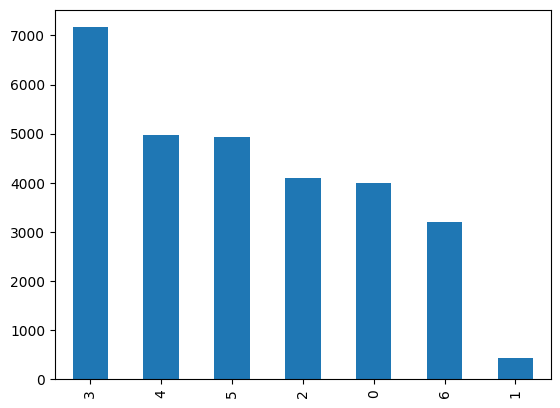

In [8]:
df['category'].value_counts().plot.bar();

In [9]:
names = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

In [11]:
ROOT_PATH = os.getcwd()
TRAIN_PATH = ROOT_PATH + 'data/train'

In [ ]:
from skimage.io import imread
import cv2

sample = random.choice(filenames)
image = imread(TRAIN_PATH + sample)